<a href="https://colab.research.google.com/github/Sidhtang/30-day-ml-challenge-/blob/main/day_23_MAKING_TRANSFOMRES_EFFICIENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#KNOWLEDGE DISTILLATION ,QUANTIZATION, PRUNING , AND GRAPH OPTIMIZATION

In [3]:
#ALL THESE TECHNIQUES WILL BE DONW THRI=OUGH OPEN NEURAL NETWORK eXCHANGE AND ORT

In [4]:
# INTENTION DETCTION CASE STUDY !
! pip install transformers






In [8]:
from transformers import pipeline
bert_ckpt = "transformersbook/bert-base-uncased-finetuned-clinc"
pipe = pipeline("text-classification", model=bert_ckpt)



Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [9]:
query = """Hey, I'd like to rent a vehicle from Nov 1st to Nov 15th in
Paris and I need a 15 passenger van"""
pipe(query)


[{'label': 'car_rental', 'score': 0.5490034222602844}]

In [7]:
#creating a performance benchmark
# model performance and latency (how a=fast model can deleiver the results),memory

In [8]:
# we  have deined an optim_type parameter to keep track of the different optimzation

class PerformanceBenchmark:
    def __init__(self, pipeline, dataset, optim_type="BERT baseline"):
        self.pipeline = pipeline
        self.dataset = dataset
        self.optim_type = optim_type

    def compute_accuracy(self):
        # We'll define this later
        pass

    def compute_size(self):
        # We'll define this later
        pass

    def time_pipeline(self):
        # We'll define this later
        pass

    def run_benchmark(self):
        metrics = {}
        metrics[self.optim_type] = self.compute_size()
        metrics[self.optim_type].update(self.time_pipeline())
        metrics[self.optim_type].update(self.compute_accuracy())
        return metrics


In [9]:
# lets check thee model acuracy by Clinic 50 datset
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [10]:
!pip uninstall pyarrow -y
!pip install pyarrow

Found existing installation: pyarrow 17.0.0
Uninstalling pyarrow-17.0.0:
  Successfully uninstalled pyarrow-17.0.0
  Using cached pyarrow-17.0.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (3.3 kB)
Using cached pyarrow-17.0.0-cp310-cp310-manylinux_2_28_x86_64.whl (39.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [1]:

#hide_output
from datasets import load_dataset

clinc = load_dataset("clinc_oos", "plus")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/15250 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3100 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5500 [00:00<?, ? examples/s]

In [2]:
sample = clinc["test"][42]
sample



{'text': 'transfer $100 from my checking to saving account', 'intent': 133}

In [4]:
intents = clinc["test"].features["intent"]
intents.int2str(sample["intent"])

'transfer'

In [5]:
from datasets import load_metric
accuracy_score = load_metric("accuracy")

<ipython-input-5-913c3a7b86a3>:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  accuracy_score = load_metric("accuracy")


The repository for accuracy contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/accuracy.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [6]:
def compute_accuracy(self):
    """This overrides the PerformanceBenchmark.compute_accuracy() method"""
    preds, labels = [], []
    for example in self.dataset:
        pred = self.pipeline(example["text"])[0]["label"] # Indent this line
        label = example["intent"] # Indent this line
        preds.append(intents.str2int(pred)) # Indent this line
        labels.append(label) # Indent this line
    accuracy = accuracy_score.compute(predictions=preds, references=labels)
    print(f"Accuracy on test set - {accuracy['accuracy']:.3f}")
    return accuracy


In [10]:
# lets compute the size of our model by using the torch.sAVE FUNCTION
#  TO SEE WAHT IS stored in thr state_dict(model)
list(pipe.model.state_dict().items())[42]

('bert.encoder.layer.2.attention.self.value.bias',
 tensor([-2.7834e-02,  4.9434e-02,  8.3551e-02,  4.1092e-02,  6.0157e-01,
          1.1774e-01, -5.2112e-02, -6.5143e-02, -2.9358e-02, -4.2250e-02,
          7.9177e-02,  8.0409e-02,  2.9921e-03,  1.7816e-01, -5.0480e-02,
         -1.5634e-01, -2.1707e-02,  1.4381e-02,  2.5132e-02, -2.4110e-02,
         -1.9183e-01, -7.8657e-02,  5.0709e-02,  3.3632e-02, -3.1946e-02,
          1.1616e-01,  9.2720e-02, -1.1787e-01,  2.3233e-01, -1.2678e-02,
         -1.3138e-01, -4.0024e-02,  7.4823e-02, -5.4148e-02, -1.5184e-01,
         -7.4407e-02,  1.1559e-01,  8.2729e-02, -1.3787e-01,  8.3528e-02,
          1.2154e-01,  1.6880e-02, -5.6629e-02, -3.9295e-02,  5.3725e-02,
          6.8602e-02, -1.1294e-01,  4.4001e-02, -2.5884e-01,  1.6767e-01,
          1.8316e-01,  5.6272e-02, -3.6874e-02, -2.7938e-02, -9.3204e-02,
         -7.5239e-03,  4.1141e-02, -1.1542e-02, -9.9749e-02, -3.0910e-02,
          4.1398e-02, -4.4389e-02, -2.6279e-02,  7.2100e-02, 

In [11]:
import torch
torch.save(pipe.model.state_dict(), "model.pt")


In [13]:
import torch
from pathlib import Path
def compute_size(self):
 """This overrides the PerformanceBenchmark.compute_size() method"""
 state_dict = self.pipeline.model.state_dict()
 tmp_path = Path("model.pt")
 torch.save(state_dict, tmp_path)
 # Calculate size in megabytes
 size_mb = Path(tmp_path).stat().st_size / (1024 * 1024)
 # Delete temporary file
 tmp_path.unlink()
 print(f"Model size (MB) - {size_mb:.2f}")
 return {"size_mb": size_mb}


In [14]:
# lets  implement the time pipeline  so that we can
#time the average latency per query  so the time it takes
# to feed a text to query


In [15]:

from time import perf_counter

for _ in range(3):
    start_time = perf_counter()
    _ = pipe(query)
    latency = perf_counter() - start_time
    print(f"Latency (ms) - {1000 * latency:.3f}")

Latency (ms) - 103.522
Latency (ms) - 101.117
Latency (ms) - 105.500


In [16]:
#collecting latencies over many runs and then calculating hte avegge latency

import numpy as np

def time_pipeline(self, query="What is the pin number for my account?"):
    """This overrides the PerformanceBenchmark.time_pipeline() method"""
    latencies = []
    # Warmup
    for _ in range(10):
        _ = self.pipeline(query)
    # Timed run
    for _ in range(100):
        start_time = perf_counter()
        _ = self.pipeline(query)
        latency = perf_counter() - start_time
        latencies.append(latency)
    # Compute run statistics
    time_avg_ms = 1000 * np.mean(latencies)
    time_std_ms = 1000 * np.std(latencies)
    print(f"Average latency (ms) - {time_avg_ms:.2f} +\- {time_std_ms:.2f}")
    return {"time_avg_ms": time_avg_ms, "time_std_ms": time_std_ms}




In [17]:
# @title making models smalller through knowledge distillation
#For supervised tasks like fine-tuning, the main idea is to augment
#the ground truth labels with a distribution of “soft probabilities” from the teacher
#which provide complementary information for the student to learn from. For exam‐
#ple, if our BERT-base classifier assigns high probabilities to multiple intents, then this
#could be a sign that these intents lie close to each other in the feature space. By train‐
#ing the student to mimic these probabilities, the goal is to distill some of this



In [18]:
# we often soften the probabilities
# by applying thr hyperparameter
# to check how much knowldege is  lost when we approximate
# the probaility distribution this help us to define a
# knowledge a  distillaton loss
#nce we already have a fine-tuned BERT-base model, let’s see how we can use knowl‐
 #edge distillation to fine-tune a smaller and faster model. To do that we’ll need a way
 #to augment the cross-entropy loss with an LKD term


In [19]:
# @title  create a knowledge distillation trainer


from transformers import TrainingArguments

class DistillationTrainingArguments(TrainingArguments):
    def __init__(self, *args, alpha=0.5, temperature=2.0, **kwargs):
        super().__init__(*args, **kwargs)
        self.alpha = alpha
        self.temperature = temperature

In [20]:
# When we instantiate DistillationTrainer we pass a
# teacher_model argument with a teacher that has already been fine-tuned on our task.
# Next, in the compute_loss() method we extract the logits from the student and
# teacher, scale them by the temperature, and then normalize them with a softmax
# before passing them to PyTorch’s nn.KLDivLoss() function for computing the KL
# divergence. One quirk with nn.KLDivLoss() is that it expects the inputs in the form
# of log probabilities and the labels as normal probabilities.
import torch
import torch.nn as nn
from transformers import Trainer
class DistillationTrainer(Trainer):
    def __init__(self, *args, teacher_model=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.teacher_model = teacher_model

    def compute_loss(self, model, inputs, return_outputs=False):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        inputs = inputs.to(device)
        outputs_stu = model(**inputs)
        # Extract cross-entropy loss and logits from student
        loss_ce = outputs_stu.loss
        logits_stu = outputs_stu.logits
        # Extract logits from teacher
        with torch.no_grad():
            outputs_tea = self.teacher_model(**inputs)
            logits_tea = outputs_tea.logits
        # Soften probabilities and compute distillation loss
        loss_fct = nn.KLDivLoss(reduction="batchmean")
        loss_kd = self.args.temperature ** 2 * loss_fct(
            F.log_softmax(logits_stu / self.args.temperature, dim=-1),
            F.softmax(logits_tea / self.args.temperature, dim=-1))
        # Return weighted student loss
        loss = self.args.alpha * loss_ce + (1. - self.args.alpha) * loss_kd
        return (loss, outputs_stu) if return_outputs else loss



In [21]:
# choosing a good student unutalisation
#so DistilBERT is a natural candidate to initialize the stu‐
 #dent with since it has 40% fewer parameters and has been shown to achieve strong
 # results on downstream tasks.
 #First we’ll need to tokenize and encode our queries, so let’s instantiate the tokenizer
 #from DistilBERT and create a simple tokenize_text() function to take care of the
 # preprocessing:
from transformers import  AutoTokenizer
student_ckpt = "distilbert-base-uncased" # Fixed typo here
student_tokenizer = AutoTokenizer.from_pretrained(student_ckpt)
def tokenize_text(batch):
 return student_tokenizer(batch["text"], truncation=True)
clinc_enc = clinc.map(tokenize_text, batched=True, remove_columns=["text"])
clinc_enc = clinc_enc.rename_column("intent", "labels")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/15250 [00:00<?, ? examples/s]

Map:   0%|          | 0/3100 [00:00<?, ? examples/s]

Map:   0%|          | 0/5500 [00:00<?, ? examples/s]

In [30]:
from huggingface_hub import notebook_login
notebook_login()

In [31]:
def compute_metrics(pred):
  predictions,labels = pred
  predictions  = np.argmax(predictions,axis=1)
  return accuracy_score.compute(predictions=predictions,references=labels)


In [32]:
batch_size=48
finetuned_ckpt = "distilbert-base-uncased-finetuned-clinc"
student_training_args = DistillationTrainingArguments(
 output_dir=finetuned_ckpt, evaluation_strategy = "epoch",
 num_train_epochs=5, learning_rate=2e-5,
 per_device_train_batch_size=batch_size,
 per_device_eval_batch_size=batch_size, alpha=1, weight_decay=0.01,
 push_to_hub=True)



/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [33]:
id2label = pipe.model.config.id2label
label2id = pipe.model.config.label2id

In [34]:
from transformers import AutoConfig

num_labels = intents.num_classes
student_config = (AutoConfig
                  .from_pretrained(student_ckpt, num_labels=num_labels,
                                   id2label=id2label, label2id=label2id))


In [35]:
import torch
from transformers import AutoModelForSequenceClassification
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def student_init():
 return (AutoModelForSequenceClassification
 .from_pretrained(student_ckpt, config=student_config).to(device))

In [36]:

#hide_output
teacher_ckpt = "transformersbook/bert-base-uncased-finetuned-clinc"
teacher_model = (AutoModelForSequenceClassification
                 .from_pretrained(teacher_ckpt, num_labels=num_labels)
                 .to(device))


In [37]:
import torch
from torch.nn import functional as F # Import the functional module

teacher_ckpt = "transformersbook/bert-base-uncased-finetuned-clinc"
teacher_model = (AutoModelForSequenceClassification
 .from_pretrained(teacher_ckpt, num_labels=num_labels)
 .to(device))
distilbert_trainer = DistillationTrainer(model_init=student_init,
 teacher_model=teacher_model, args=student_training_args,
 train_dataset=clinc_enc['train'], eval_dataset=clinc_enc['validation'],
 compute_metrics=compute_metrics, tokenizer=student_tokenizer)
distilbert_trainer.train()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,3.293084,0.725484
2,3.800900,1.884935,0.852581
3,3.800900,1.170155,0.889677
4,1.712800,0.871707,0.914516
5,0.920600,0.787232,0.920645


TrainOutput(global_step=1590, training_loss=2.0674823641027293, metrics={'train_runtime': 298.2403, 'train_samples_per_second': 255.666, 'train_steps_per_second': 5.331, 'total_flos': 414689637990180.0, 'train_loss': 2.0674823641027293, 'epoch': 5.0})

In [38]:

distilbert_trainer.push_to_hub("Training completed!")

events.out.tfevents.1724923048.313ad1cdcb51.1481.0:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/sidhtang/distilbert-base-uncased-finetuned-clinc/commit/632dbcfe9096e13091f91e7c8cf78be65b9589eb', commit_message='Training completed!', commit_description='', oid='632dbcfe9096e13091f91e7c8cf78be65b9589eb', pr_url=None, pr_revision=None, pr_num=None)

In [39]:
finetuned_ckpt = "transformersbook/distilbert-base-uncased-finetuned-clinc"
pipe = pipeline("text-classification", model=finetuned_ckpt)

config.json:   0%|          | 0.00/8.21k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [46]:
import matplotlib.pyplot as plt


<ipython-input-47-4a061570d6b2>:15: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


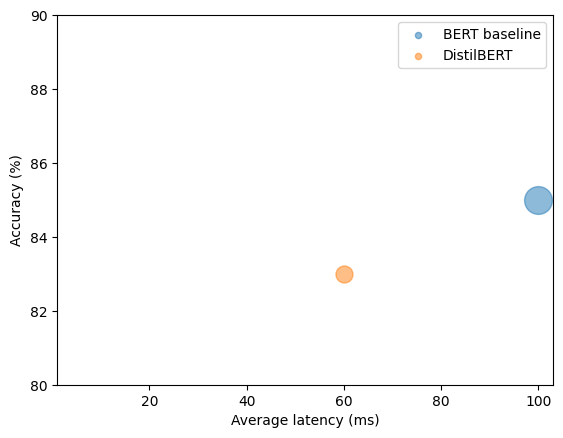

In [47]:
import pandas as pd
def plot_metrics(perf_metrics, current_optim_type):
    df = pd.DataFrame.from_dict(perf_metrics, orient='index')
    for idx in df.index:
        df_opt = df.loc[idx]
        # Add a dashed circle around the current optimization type
        if idx == current_optim_type:
            plt.scatter(df_opt["time_avg_ms"], df_opt["accuracy"] * 100,
                        alpha=0.5, s=df_opt["size_mb"], label=idx,
                        marker='o') # Fix the marker string
        else:
            plt.scatter(df_opt["time_avg_ms"], df_opt["accuracy"] * 100,
                        s=df_opt["size_mb"], label=idx, alpha=0.5)
    legend = plt.legend(bbox_to_anchor=(1,1))
    for handle in legend.legendHandles:
        handle.set_sizes([20])
    plt.ylim(80,90)
    # Use the slowest model to define the x-axis range
    xlim = int(perf_metrics["BERT baseline"]["time_avg_ms"] + 3)
    plt.xlim(1, xlim)
    plt.ylabel("Accuracy (%)")
    plt.xlabel("Average latency (ms)")
    plt.show()

# Example usage - replace with your actual performance metrics
perf_metrics = {
    "BERT baseline": {"time_avg_ms": 100, "accuracy": 0.85, "size_mb": 400},
    "DistilBERT": {"time_avg_ms": 60, "accuracy": 0.83, "size_mb": 150}
    # ... add metrics for other optimization types
}
optim_type = "DistilBERT"

plot_metrics(perf_metrics, optim_type)

In [37]:
#from the plot we can see that by using a smaller model
#we have managed to sigmifcantly decrease the average latency .
#all that just over a 1%  distillation loss

In [37]:
# finding good hyperparameters with optuna
# optua is aoptimization frame work
# it formulates  the search problems in terms of an objective function

In [37]:
#To use Optuna in Transformers,
 #we use similar logic by first defining the hyperparameter space that we wish to opti‐
 #mize over.

In [49]:
! pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.0 MB/s eta 0:00:00


In [50]:
import optuna

In [51]:
def hp_space(trial):
 return {"num_train_epochs": trial.suggest_int("num_train_epochs", 5, 10),
 "alpha": trial.suggest_float("alpha", 0, 1),
 "temperature": trial.suggest_int("temperature", 2, 20)}

In [52]:
best_run = distilbert_trainer.hyperparameter_search(
 n_trials=20, direction="maximize", hp_space=hp_space)


[I 2024-08-29 09:45:55,464] A new study created in memory with name: no-name-5a6201f3-0b9e-40ec-9e33-df10a7980525
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.202558,0.588065
2,0.324600,0.098602,0.816452
3,0.324600,0.066279,0.876774
4,0.114300,0.051673,0.897419
5,0.073900,0.042958,0.904839
6,0.073900,0.038165,0.909355
7,0.059100,0.035836,0.914516
8,0.053100,0.034904,0.916774


[I 2024-08-29 09:54:13,703] Trial 0 finished with value: 0.9167741935483871 and parameters: {'num_train_epochs': 8, 'alpha': 0.06976204710052925, 'temperature': 10}. Best is trial 0 with value: 0.9167741935483871.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.199971,0.593871
2,0.322900,0.095595,0.823871
3,0.322900,0.063114,0.881290
4,0.111100,0.048286,0.900645
5,0.069900,0.039192,0.910323
6,0.069900,0.034079,0.913226
7,0.054200,0.031311,0.922903
8,0.046800,0.028977,0.927097
9,0.046800,0.027914,0.928387
10,0.043400,0.027559,0.929677


[I 2024-08-29 10:05:41,243] Trial 1 finished with value: 0.9296774193548387 and parameters: {'num_train_epochs': 10, 'alpha': 0.536199859890321, 'temperature': 10}. Best is trial 1 with value: 0.9296774193548387.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.199486,0.557742
2,0.313100,0.104623,0.800323
3,0.313100,0.076082,0.852903
4,0.120500,0.064436,0.875484
5,0.087500,0.060725,0.878065


[I 2024-08-29 10:12:59,290] Trial 2 finished with value: 0.8780645161290322 and parameters: {'num_train_epochs': 5, 'alpha': 0.7314621434307848, 'temperature': 19}. Best is trial 1 with value: 0.9296774193548387.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss


[W 2024-08-29 10:13:11,229] Trial 3 failed with parameters: {'num_train_epochs': 7, 'alpha': 0.7731004580925228, 'temperature': 13} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "/usr/local/lib/python3.10/dist-packages/transformers/integrations/integration_utils.py", line 211, in _objective
    trainer.train(resume_from_checkpoint=checkpoint, trial=trial)
  File "/usr/local/lib/python3.10/dist-packages/transformers/trainer.py", line 1923, in train
    return inner_training_loop(
  File "/usr/local/lib/python3.10/dist-packages/transformers/trainer.py", line 2273, in _inner_training_loop
    and (torch.isnan(tr_loss_step) or torch.isinf(tr_loss_step))
KeyboardInterrupt
[W 2024-08-29 10:13:11,232] Trial 3 failed with value None.


KeyboardInterrupt: 

In [ ]:
print(best_run)